# av-job-a-thon-sept2021

Use the "Run" button to execute the code.

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="av-job-a-thon-sept2021")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pknayak0707-job/av-job-a-thon-sept2021


'https://jovian.ai/pknayak0707-job/av-job-a-thon-sept2021'

## Step 1: Importing and Merging Data

In [5]:
# Load the Drive helper and mount the drive instance
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [8]:
# the path of the loaction where the data is present
data_dir = '/content/drive/MyDrive/Professional/Coding Challenges/Analytics Vidhya/Job-a-thon Sept 2021'

In [ ]:
original_train_path = data_dir + '/TRAIN.csv'
original_train_path

'/content/drive/MyDrive/Professional/Coding Challenges/Analytics Vidhya/Job-a-thon Sept 2021/TRAIN.csv'

In [ ]:
sales_train_df = pd.read_csv(original_train_path)
sales_train_df.head(5)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [ ]:
sales_train_df.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [ ]:
#/content/drive/MyDrive/Professional/Coding Challenges/Analytics Vidhya/Job-a-thon Sept 2021/TEST_FINAL.csv

In [ ]:
# escape character
!ls /content/drive/MyDrive/Professional/Coding\ Challenges/Analytics\ Vidhya/Job-a-thon\ Sept\ 2021

'Data Dictionary.gsheet'   SAMPLE.csv   TEST_FINAL.csv	 TRAIN.csv


In [ ]:
original_test_path = data_dir + '/TEST_FINAL.csv'
sales_test_df = pd.read_csv(original_test_path)
sales_test_df.head(5)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [ ]:
sample_sub = pd.read_csv(data_dir + '/SAMPLE.csv')
sample_sub.head(5)

,ID,Sales
0,T1188341,42275
1,T1188342,42275
2,T1188343,42275
3,T1188344,42275
4,T1188345,42275


In [ ]:
sample_sub.shape

(22265, 2)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pknayak0707-job/av-job-a-thon-sept2021


'https://jovian.ai/pknayak0707-job/av-job-a-thon-sept2021'

## Step 2: Inspecting the Dataframe

### Shape of the datasets

In [ ]:
sales_train_df.shape

(188340, 10)

In [ ]:
sales_test_df.shape

(22265, 8)

In [ ]:
[x for x in sales_train_df.columns if x not in sales_test_df.columns]

['#Order', 'Sales']

The columns `#Order`, `Sales` 

### Unique Values of the columns

In [ ]:
for cols in sales_train_df.columns:
  print(cols)
  print('----------Unique values in '+ cols +' column-------------------')
  print(sales_train_df[cols].unique())

ID
----------Unique values in ID column-------------------
['T1000001' 'T1000002' 'T1000003' ... 'T1188338' 'T1188339' 'T1188340']
Store_id
----------Unique values in Store_id column-------------------
[  1 253 252 251 250 249 248 247 246 254 245  11 243 242 241 240 239 238
 237 244 236 255 256 273 272 271 270 269 268   9 267  10 266 264 263 262
 261 260 259 258 257 265 235 234 233 211 210 209 208 207  14 206 205 212
 204 202 201 200 199 198 197 196 195 203 213 214 215 232  12 231 230 229
 228 227 226 225 224 223 222 221 220 219  13 218 217 216 274  15 275 277
 335 334 333 332 331 330   4 329 336 328 326 325 324 323 322 321 320 319
 327 318 337 339 355 354   2 353 352 351 350 349 338 348 346 345 344 343
 342   3 341 340 347 317   5 316 293   7 292 291 290 289 288 287 294 286
 284 283 282 281   8 280 279 278 285 295 296 297 315 314 313 312 311 310
 309 308 307 306 305   6 304 303 302 301 300 299 298 276 194 193 192  87
  86  85  24  84  83  82  81  88  80  78  77  76  75  74  73  72  25

In [ ]:
sales_train_df.groupby('Store_id').count()['ID']

Store_id
1      516
2      516
3      516
4      516
5      516
      ... 
361    516
362    516
363    516
364    516
365    516
Name: ID, Length: 365, dtype: int64

In [ ]:
for cols in sales_test_df.columns:
  print(cols)
  print('----------Unique values in '+ cols +' column-------------------')
  print(sales_test_df[cols].unique())

ID
----------Unique values in ID column-------------------
['T1188341' 'T1188342' 'T1188343' ... 'T1210603' 'T1210604' 'T1210605']
Store_id
----------Unique values in Store_id column-------------------
[171 172 173 174 170 175 176 169  14 177 178 179 185 181 182 183 184 186
 187 188 189 190 191 168  13 180 167 142 165 140 141 143 144 145 146 147
  16 148 149 150 151 166 152 154 155 156 157 158 159 160 161 162  15 163
 164 153 192 246 194 224 225 226 227 228 229 230 231 232 233 234  10 223
 235 237 238 239 240 241 242 243 244 245 139 247 248 236 222 221  11 195
 196 197 198 199 200 201 202 203 204 205  12 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 193 138  82 136  54  55  56  57  58  59
  60  22  61  62  63  64  53  65  67  68  69  70  71  72  73  74  75  21
  76  77  66  52  51  50  26  27 249  28  29  30  31  24  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  23  47  48  49  78 137  79
  81 112 113 114 115 116 117 118  18 119 120 121 122 111 123 125 126

In [ ]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [ ]:
sales_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB




*   Discount convert to  biniary 0 and 1 . Then convert into integer data type
*   Removing the first character from the columns store_type, location_type and region_type to convert them from categorical object into numerical data type
* #Orders column is not present in the test file.Extract info from the orders and tother columns and try to add it to the 
* Extract the day, month , date from the date field


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pknayak0707-job/av-job-a-thon-sept2021


'https://jovian.ai/pknayak0707-job/av-job-a-thon-sept2021'

### Step 3: Data Preparation

#### Discount Column Modification

In [ ]:
sales_train_df['Discount'].replace({'No':'0', 'Yes' : '1'}, inplace= True)

In [ ]:
sales_train_df[['Discount']] = sales_train_df[['Discount']].astype(int)

In [ ]:
sales_train_df['Discount'].unique()

array([1, 0])

#### Store_Type,  Location_Type, Region_Code  Columns Modification

In [ ]:
#sales_train_df['Store_Type'][0][1:]

In [ ]:
rough = sales_train_df.copy()

In [ ]:
#rough['Store_Type'] = rough['Store_Type'].apply(lambda x:x[1:])

In [ ]:
#rough['Store_Type'].unique()

In [ ]:
sales_train_df['Store_Type'] = sales_train_df['Store_Type'].apply(lambda x:x[1:])
sales_train_df['Store_Type'].unique()

array(['1', '4', '3', '2'], dtype=object)

In [ ]:
sales_train_df[['Store_Type']] = sales_train_df[['Store_Type']].astype(int)

In [ ]:
sales_train_df['Location_Type'] = sales_train_df['Location_Type'].apply(lambda x:x[1:])
sales_train_df['Location_Type'].unique()

array(['3', '2', '1', '5', '4'], dtype=object)

In [ ]:
sales_train_df[['Location_Type']] = sales_train_df[['Location_Type']].astype(int)

In [ ]:
sales_train_df['Region_Code'] = sales_train_df['Region_Code'].apply(lambda x:x[1:])
sales_train_df['Region_Code'].unique()

array(['1', '4', '2', '3'], dtype=object)

In [ ]:
sales_train_df[['Region_Code']] = sales_train_df[['Region_Code']].astype(int)

In [ ]:
sales_train_df[['Date']] = sales_train_df[['Date']].astype('datetime64[ns]')

In [ ]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  int64         
 3   Location_Type  188340 non-null  int64         
 4   Region_Code    188340 non-null  int64         
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  int64         
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 14.4+ MB


### Date column Modification

In [ ]:
sales_train_df.head(5)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,1,3,1,2018-01-01,1,1,9,7011.84
1,T1000002,253,4,2,1,2018-01-01,1,1,60,51789.12
2,T1000003,252,3,2,1,2018-01-01,1,1,42,36868.20
3,T1000004,251,2,3,1,2018-01-01,1,1,23,19715.16
4,T1000005,250,2,3,4,2018-01-01,1,1,62,45614.52


In [ ]:
sales_train_df['Date'].dt.day.head()

0    1
1    1
2    1
3    1
4    1
Name: Date, dtype: int64

In [ ]:
sales_train_df['Day'] = sales_train_df['Date'].dt.day
sales_train_df['Month'] = sales_train_df['Date'].dt.month
sales_train_df['Year'] = sales_train_df['Date'].dt.year

In [ ]:
sales_train_df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Day,Month,Year
0,T1000001,1,1,3,1,2018-01-01,1,1,9,7011.84,1,1,2018
1,T1000002,253,4,2,1,2018-01-01,1,1,60,51789.12,1,1,2018
2,T1000003,252,3,2,1,2018-01-01,1,1,42,36868.20,1,1,2018
3,T1000004,251,2,3,1,2018-01-01,1,1,23,19715.16,1,1,2018
4,T1000005,250,2,3,4,2018-01-01,1,1,62,45614.52,1,1,2018


In [ ]:
rough['avg_price'] = rough['Sales']/rough['#Order']

In [ ]:
rough['avg_price'].unique()

array([779.09333333, 863.152     , 877.81428571, ..., 634.35789474,
       606.36266667, 564.72428571])

In [ ]:
sales_train_df['avg_price'] = sales_train_df['Sales']/sales_train_df['#Order']

#### Same for the Test Files


In [ ]:
sales_test_df['Discount'].replace({'No':'0', 'Yes' : '1'}, inplace= True)
sales_test_df[['Discount']] = sales_test_df[['Discount']].astype(int)
sales_test_df['Discount'].unique()

array([0, 1])

In [ ]:
sales_test_df['Store_Type'] = sales_test_df['Store_Type'].apply(lambda x:x[1:])
sales_test_df['Store_Type'].unique()
sales_test_df[['Store_Type']] = sales_test_df[['Store_Type']].astype(int)

In [ ]:
sales_test_df['Location_Type'] = sales_test_df['Location_Type'].apply(lambda x:x[1:])
sales_test_df['Location_Type'].unique()
sales_test_df[['Location_Type']] = sales_test_df[['Location_Type']].astype(int)

In [ ]:
sales_test_df['Region_Code'] = sales_test_df['Region_Code'].apply(lambda x:x[1:])
sales_test_df['Region_Code'].unique()
sales_test_df[['Region_Code']] = sales_test_df[['Region_Code']].astype(int)


In [ ]:
sales_test_df[['Date']] = sales_test_df[['Date']].astype('datetime64[ns]')

In [ ]:
sales_test_df['Day'] = sales_test_df['Date'].dt.day
sales_test_df['Month'] = sales_test_df['Date'].dt.month
sales_test_df['Year'] = sales_test_df['Date'].dt.year

#### Adding the orders column for the tes file based on the Region , locatio n and store type

In [ ]:
sales_train_df.groupby(['Region_Code','Location_Type','Store_Type']).median()['#Order']

Region_Code  Location_Type  Store_Type
1            1              1              57.0
                            2              44.0
                            3              72.0
                            4              89.0
             2              1              63.0
                            3              72.0
                            4             111.5
             3              1              58.0
                            2              45.0
                            3              72.0
             4              1              55.0
             5              1              59.0
                            2              37.0
2            1              1              59.0
                            2              43.0
                            3              71.0
                            4              89.0
             2              1              64.0
                            3              74.0
                            4             100.0
 

In [ ]:
orders_grp_by_dict = sales_train_df.groupby(['Region_Code','Location_Type','Store_Type']).median()['#Order'].to_dict()

In [ ]:
orders_grp_by_dict[(1,1,1)]

57.0

In [ ]:
len(orders_grp_by_dict)

50

In [ ]:
sales_test_df.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', 'Day', 'Month', 'Year', '#Order'],
      dtype='object')

In [ ]:
sales_test_df.loc[(sales_test_df['Region_Code']==1) & (sales_test_df['Location_Type']==1) & (sales_test_df['Store_Type']==1)]['#Order']

In [ ]:
#dd.a[dd.a == 1] = 100
%time sales_test_df['#Order'][(sales_test_df['Region_Code']==1) & \
                        (sales_test_df['Location_Type']==1) & \
                        (sales_test_df['Store_Type']==1)] = orders_grp_by_dict[(1,1,1)]

CPU times: user 6.16 ms, sys: 0 ns, total: 6.16 ms
Wall time: 10.1 ms


In [ ]:
sales_test_df.loc[(sales_test_df['Region_Code']==1) & (sales_test_df['Location_Type']==1) & (sales_test_df['Store_Type']==1)]['#Order']

1        57.0
18       57.0
60       57.0
63       57.0
101      57.0
         ... 
22147    57.0
22154    57.0
22217    57.0
22223    57.0
22257    57.0
Name: #Order, Length: 1037, dtype: float64

In [ ]:
%time
for key,value in orders_grp_by_dict.items():
  #print(key[0],key[1],key[2])
  sales_test_df['#Order'][(sales_test_df['Region_Code']==key[0]) & \
                        (sales_test_df['Location_Type']==key[1]) & \
                        (sales_test_df['Store_Type']==key[2])] = orders_grp_by_dict[(key[0],key[1],key[2])]

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.34 µs


In [ ]:
sales_test_df.loc[(sales_test_df['Region_Code']==2) & (sales_test_df['Location_Type']==1) & (sales_test_df['Store_Type']==3)]['#Order']

44       71.0
131      71.0
132      71.0
141      71.0
260      71.0
         ... 
22022    71.0
22029    71.0
22122    71.0
22191    71.0
22240    71.0
Name: #Order, Length: 427, dtype: float64

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

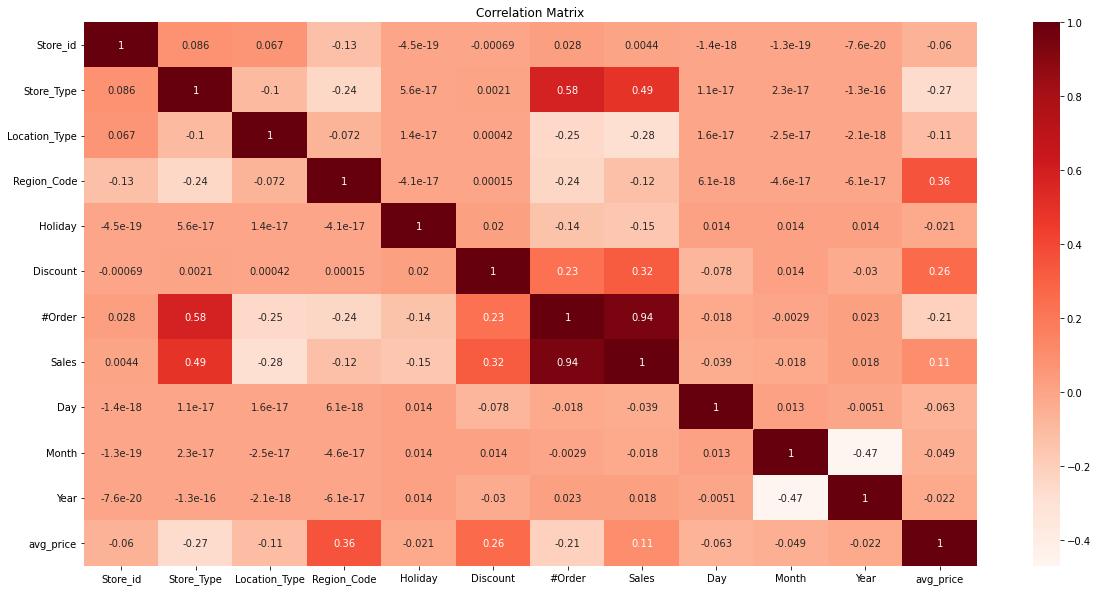

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(sales_train_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pknayak0707-job/av-job-a-thon-sept2021


'https://jovian.ai/pknayak0707-job/av-job-a-thon-sept2021'

## Step 4: Encoding categorical Values and Feature Scaling

In [ ]:
sales_train_df.isnull().sum()

ID                0
Store_id          0
Store_Type        0
Location_Type     0
Region_Code       0
Date              0
Holiday           0
Discount          0
#Order            0
Sales             0
Day               0
Month             0
Year              0
avg_price        19
dtype: int64

In [ ]:
sales_test_df.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
Day              0
Month            0
Year             0
dtype: int64

In [ ]:
sales_train_df.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales', 'Day', 'Month', 'Year',
       'avg_price'],
      dtype='object')

In [ ]:
# Removing 'ID', '#Order', 'Sales', 'avg_price' column from predicting the sales
input_cols = ['Store_id', 'Store_Type', 'Location_Type', 'Region_Code',
       'Holiday', 'Discount', 'Day', 'Month', 'Year']

In [ ]:
target_col ='Sales'

In [ ]:
print(list(input_cols))

['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Holiday', 'Discount', 'Day', 'Month', 'Year']


In [ ]:
len(input_cols) , target_col

(9, 'Sales')

In [ ]:
inputs_df = sales_train_df[input_cols].copy()

In [ ]:
targets = sales_train_df[target_col]

In [ ]:
inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Store_id       188340 non-null  int64
 1   Store_Type     188340 non-null  int64
 2   Location_Type  188340 non-null  int64
 3   Region_Code    188340 non-null  int64
 4   Holiday        188340 non-null  int64
 5   Discount       188340 non-null  int64
 6   Day            188340 non-null  int64
 7   Month          188340 non-null  int64
 8   Year           188340 non-null  int64
dtypes: int64(9)
memory usage: 12.9 MB


In [ ]:
inputs_df.head(10)

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Day,Month,Year
0,1,1,3,1,1,1,1,1,2018
1,253,4,2,1,1,1,1,1,2018
2,252,3,2,1,1,1,1,1,2018
3,251,2,3,1,1,1,1,1,2018
4,250,2,3,4,1,1,1,1,2018
5,249,1,3,2,1,1,1,1,2018
6,248,1,1,2,1,1,1,1,2018
7,247,1,1,3,1,1,1,1,2018
8,246,3,1,3,1,1,1,1,2018
9,254,4,1,1,1,1,1,1,2018


In [ ]:
targets[0:10]

0     7011.84
1    51789.12
2    36868.20
3    19715.16
4    45614.52
5    34211.22
6    35352.66
7    52650.00
8    42633.78
9    62572.80
Name: Sales, dtype: float64

##### Identify Numeric and Categorical Data (Feature Scaling is not needed)


In [ ]:
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
print(list(numeric_cols))

['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Holiday', 'Discount', 'Day', 'Month', 'Year']


In [ ]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Day,Month,Year
min,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2018.0
max,365.0,4.0,5.0,4.0,1.0,1.0,31.0,12.0,2019.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(car_prices_train_df[numeric_cols])

NameError: ignored

## Step 5: Test-Train Split

### Training and Validation Set

25% as validation set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Due the temporal nature of the prediction we have to use the different type of splitting method
# train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numeric_cols], 
#                                                                         targets, 
#                                                                         test_size=0.25, 
#                                                                         random_state=42)

In [ ]:
len(inputs_df[numeric_cols])

188340

In [ ]:
train_size = int(len(inputs_df[numeric_cols]) * 0.70)
train_inputs, val_inputs, train_targets, val_targets = inputs_df[0:train_size], \
                                inputs_df[train_size:len(inputs_df[numeric_cols])], \
                                targets[0:train_size], \
                                targets[train_size:len(inputs_df[numeric_cols])] \

print('Observations: %d' % (len(inputs_df[numeric_cols])))
print('Training inputs Observations: %d' % (len(train_inputs)))
print('Training targets Observations: %d' % (len(train_targets)))
print('Validation inputs Observations: %d' % (len(val_inputs)))
print('Validation targets Observations: %d' % (len(val_targets)))

Observations: 188340
Training inputs Observations: 131838
Training targets Observations: 131838
Validation inputs Observations: 56502
Validation targets Observations: 56502


In [ ]:
train_inputs.head(10)

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Day,Month,Year
0,1,1,3,1,1,1,1,1,2018
1,253,4,2,1,1,1,1,1,2018
2,252,3,2,1,1,1,1,1,2018
3,251,2,3,1,1,1,1,1,2018
4,250,2,3,4,1,1,1,1,2018
5,249,1,3,2,1,1,1,1,2018
6,248,1,1,2,1,1,1,1,2018
7,247,1,1,3,1,1,1,1,2018
8,246,3,1,3,1,1,1,1,2018
9,254,4,1,1,1,1,1,1,2018


In [ ]:
train_targets[0:10]

0     7011.84
1    51789.12
2    36868.20
3    19715.16
4    45614.52
5    34211.22
6    35352.66
7    52650.00
8    42633.78
9    62572.80
Name: Sales, dtype: float64

In [ ]:
val_inputs.head(10)

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Day,Month,Year
131838,328,1,3,1,0,0,28,12,2018
131839,86,1,1,4,0,0,28,12,2018
131840,235,1,1,3,0,0,28,12,2018
131841,158,4,2,2,0,0,28,12,2018
131842,296,1,1,1,0,0,28,12,2018
131843,151,1,3,2,0,1,28,12,2018
131844,259,4,1,1,0,0,28,12,2018
131845,52,1,1,3,0,1,28,12,2018
131846,302,1,4,2,0,1,28,12,2018
131847,218,1,3,2,0,0,28,12,2018


In [ ]:
val_targets[0:10]

131838    31938.0
131839    32331.0
131840    34197.0
131841    84990.0
131842    33309.0
131843    32760.0
131844    44580.0
131845    60582.0
131846    41991.0
131847    28740.0
Name: Sales, dtype: float64

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pknayak0707-job/av-job-a-thon-sept2021


'https://jovian.ai/pknayak0707-job/av-job-a-thon-sept2021'

## Step 6: Train Regression Model and Evaluate the model simultaneously


*   Linear Regression
*   XGBoost



In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
print('inputs.shape :', train_inputs.shape)
print('targets.shape :', train_targets.shape)

inputs.shape : (131838, 9)
targets.shape : (131838,)


In [ ]:
#model.fit(train_inputs,np.log(train_targets))
model.fit(train_inputs,train_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###  XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [ ]:
print('inputs.shape :', train_inputs.shape)
print('targets.shape :', train_targets.shape)

inputs.shape : (131838, 9)
targets.shape : (131838,)


In [ ]:
model.fit(train_inputs,train_targets)

[06:29:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=20,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

#### Hyper parameter tuning of the XGboost model by using cross validation



*   write the whole helper function and then use the model



Evaluate Model using the RMSLE

The evaluation metric for this competition is MSLE * 1000 across all entries in the test set.

In [ ]:
from sklearn.metrics import mean_squared_log_error

In [ ]:
train_preds = model.predict(train_inputs)

In [ ]:
train_msle = mean_squared_log_error(train_targets,train_preds)

In [ ]:
print('The RMSLE loss for the validating set is {}.'.format(train_msle*1000))

The RMSLE loss for the validating set is 117.38712466076198.


In [ ]:
val_preds = model.predict(val_inputs)

In [ ]:
val_preds

array([25994.5  , 30838.89 , 30838.89 , ..., 23020.764, 36448.945,
       25514.523], dtype=float32)

In [ ]:
val_targets.shape

(56502,)

In [ ]:
val_msle = mean_squared_log_error(val_targets,val_preds)

In [ ]:
print('The RMSLE loss for the validating set is {}.'.format(val_msle*1000))

The RMSLE loss for the validating set is 119.79903753882739.


In [ ]:
?jovian.log_metrics()

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pknayak0707-job/av-job-a-thon-sept2021


'https://jovian.ai/pknayak0707-job/av-job-a-thon-sept2021'

# Step 7 : Predicting the Price for the test values

In [ ]:
sales_test_df.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', 'Day', 'Month', 'Year', '#Order'],
      dtype='object')

In [ ]:
test_input_cols = ['Store_id', 'Store_Type', 'Location_Type', 'Region_Code',
       'Holiday', 'Discount', 'Day', 'Month', 'Year']

In [ ]:
test_target_col ='Sales'

In [ ]:
print(list(input_cols))

['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Holiday', 'Discount', 'Day', 'Month', 'Year']


In [ ]:
len(input_cols)

9

In [ ]:
print(target_col)

Sales


In [ ]:
sales_train_df['#Order'].median()

63.0

In [ ]:
#sales_test_df['#Order'] = sales_train_df['#Order'].median()
#sales_test_df['#Order'] = sales_test_df['#Order'].astype(int)

In [ ]:
test_inputs_df = sales_test_df[input_cols].copy()

In [ ]:
test_inputs_df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Day,Month,Year
0,171,4,2,3,0,0,1,6,2019
1,172,1,1,1,0,0,1,6,2019
2,173,4,2,1,0,0,1,6,2019
3,174,1,1,4,0,0,1,6,2019
4,170,1,1,2,0,0,1,6,2019


##### Predicting using the model selected


In [ ]:
test_inputs = test_inputs_df[numeric_cols]

In [ ]:
print('inputs.shape :', test_inputs.shape)

inputs.shape : (22265, 9)


In [ ]:
test_preds = model.predict(test_inputs)

In [ ]:
test_preds

array([50807.484, 31086.426, 52539.184, ..., 40240.246, 31086.426,
       29002.783], dtype=float32)

In [ ]:
sub_df = pd.DataFrame()

In [ ]:
sub_df['ID'] = sales_test_df['ID']

In [ ]:
sub_df['Sales'] = test_preds

In [ ]:
sub_df = sub_df[['ID','Sales']]

In [ ]:
sub_df.shape

(22265, 2)

In [ ]:
sub_df.head(7)

,ID,Sales
0,T1188341,50807.484375
1,T1188342,31086.425781
2,T1188343,52539.183594
3,T1188344,31086.425781
4,T1188345,31086.425781
5,T1188346,52539.183594
6,T1188347,50807.484375


In [ ]:
sub_df.to_csv('XGB_MLSE_no_ord.csv', index= False)

In [10]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pknayak0707-job/av-job-a-thon-sept2021


'https://jovian.ai/pknayak0707-job/av-job-a-thon-sept2021'

### Pulic Leaderboard

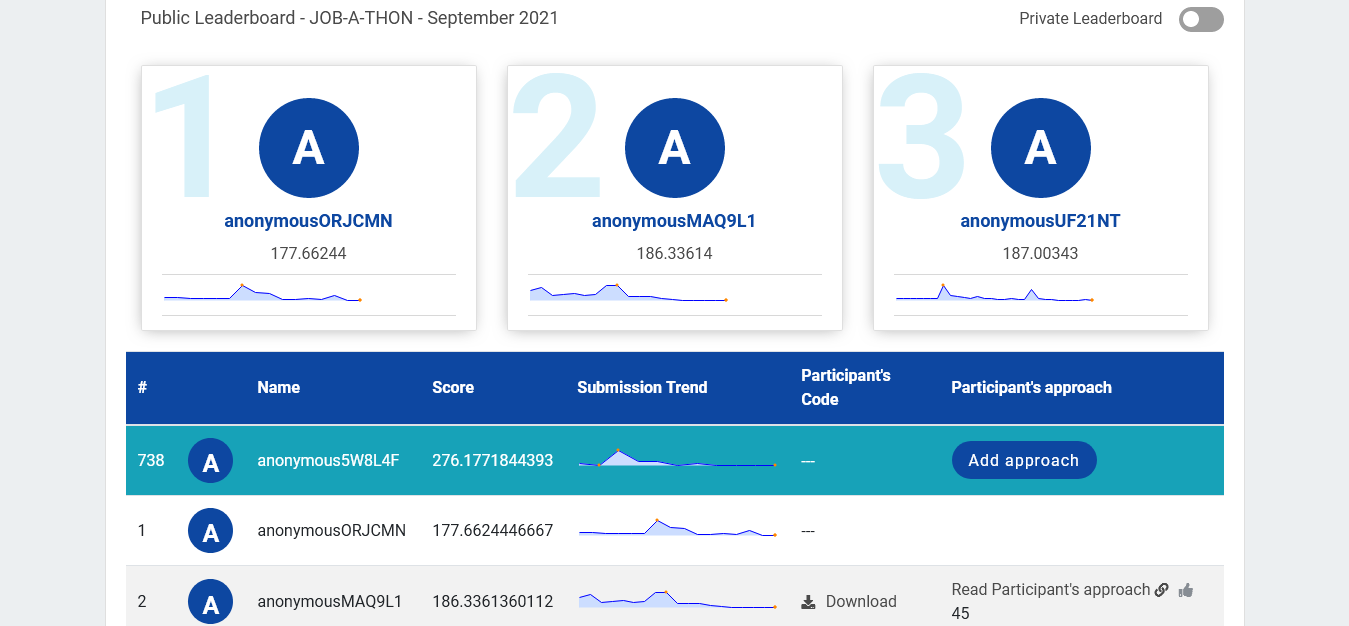

### Private Leaderboard

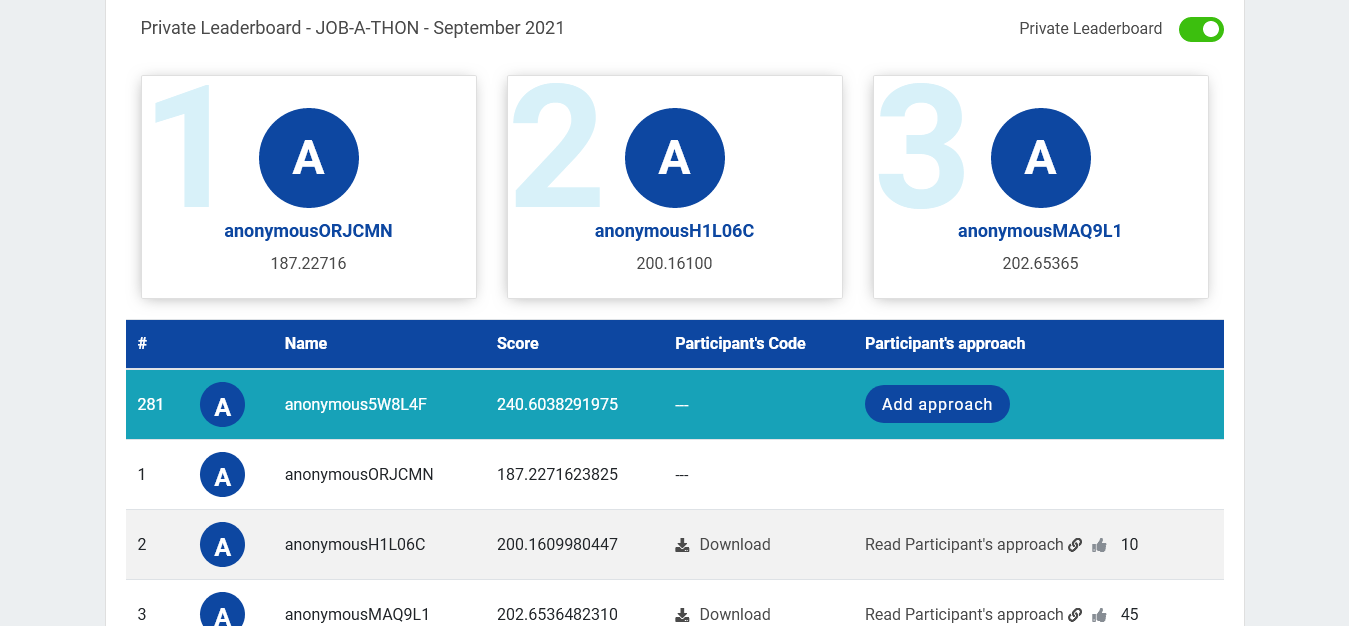